In [45]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

from src.utils.DataGenerator import DataGenerator
from src.methods.AALS import AALS
from src.methods.ClosedFormArchetypalAnalysis import ClosedFormArchetypalAnalysis
from src.methods.PCHABer import PCHABer

from src.visualisations.PlotLossArc import plot_loss_arc
from src.visualisations.PlotNMIStability import plot_nmi_stability

from src.utils.NMI import calcNMI


# Initialise some synthetic data


In [2]:
n_samples, n_features, n_arc = 1000, 100, 5
distribution = "Bernoulli" # Bernoulli, Gaussian or Poisson supported 
sparsity = 0.4
alpha = 1 
seed = 42 
noise = 0.1 
base = 'torch' # Numpy or torch supported 

X= DataGenerator(n_samples, n_features, n_arc, distribution, sparsity, alpha, seed, noise,base).CreateData()

# X here is features x samples 

# Run for different hyper parameters


In [4]:
# Find optimal number of archetypes (True = 5)
n_arc_list = [2,3,4,5,6,7,8,9,10]
Losses = np.zeros((len(n_arc_list),10))
Ss = np.zeros((len(n_arc_list),10),dtype=object)

for n in tqdm(n_arc_list):
    for i in range(10):

        C,S,L = ClosedFormArchetypalAnalysis(X, np.arange(n_samples), n, distribution, base)
        Losses[n_arc_list.index(n),i] = L[-1]
        Ss[n_arc_list.index(n),i] = S


  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\aejew\OneDrive - Danmarks Tekniske Universitet\Dokumenter\GitHub\Archetypal-Analysis-For-Binary-Data\Python\src\methods\fnnls.py:86: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3618.)
  XtX_PP = torch.hstack((XtX_PP[0],X[:,t].T@X[:,PP[:-1]]))
100%|██████████| 9/9 [11:15<00:00, 75.08s/it] 


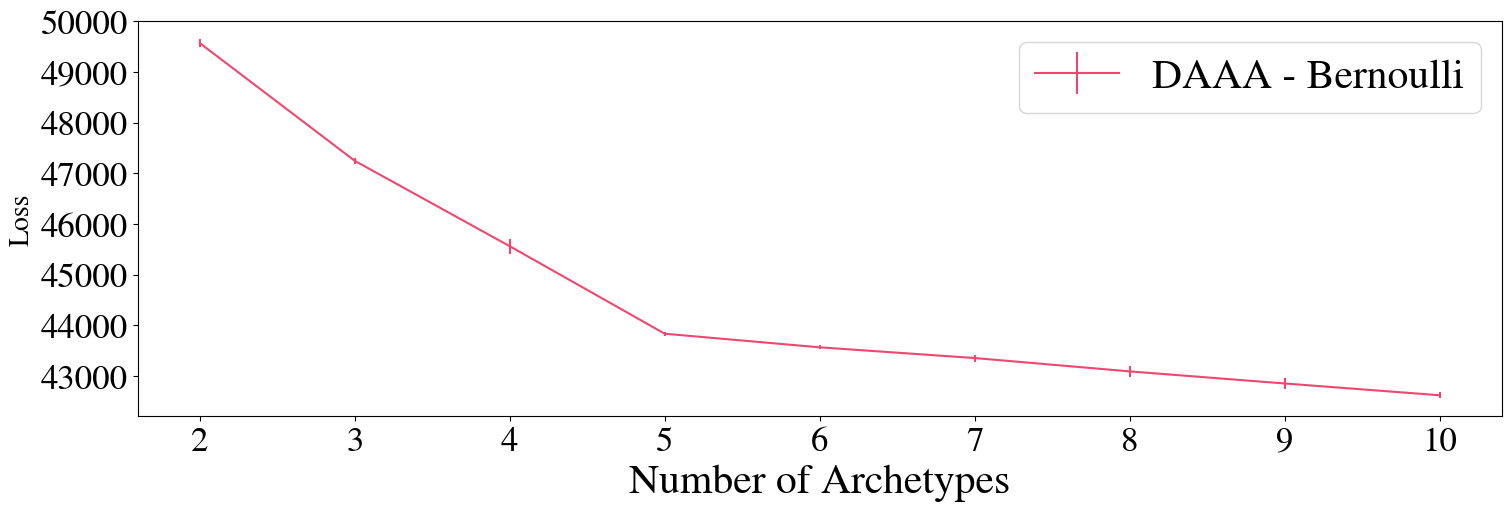

In [ ]:

colors = ["#EF476F",  "#06D6A0", "#FFD166", "#073B4C", "#118AB2", "#FF6B6B", "#C8A2C8"]


plot_loss_arc(Losses,n_arc_list,i,colors[0],'DAAA', 'Bernoulli', savedir = None)

In [40]:
test = itertools.combinations(range(10), 2)
t = list(test)
calcIDX = np.array(t)

NMI = np.zeros((len(n_arc_list),len(calcIDX)))

for n in tqdm(n_arc_list):
    for j in range(len(calcIDX)):

        S1 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,0]])
        S2 = np.asarray(Ss[n_arc_list.index(n),calcIDX[j,1]])


        NMI[n_arc_list.index(n),j] = calcNMI(S1,S2)



100%|██████████| 9/9 [00:00<00:00, 162.84it/s]


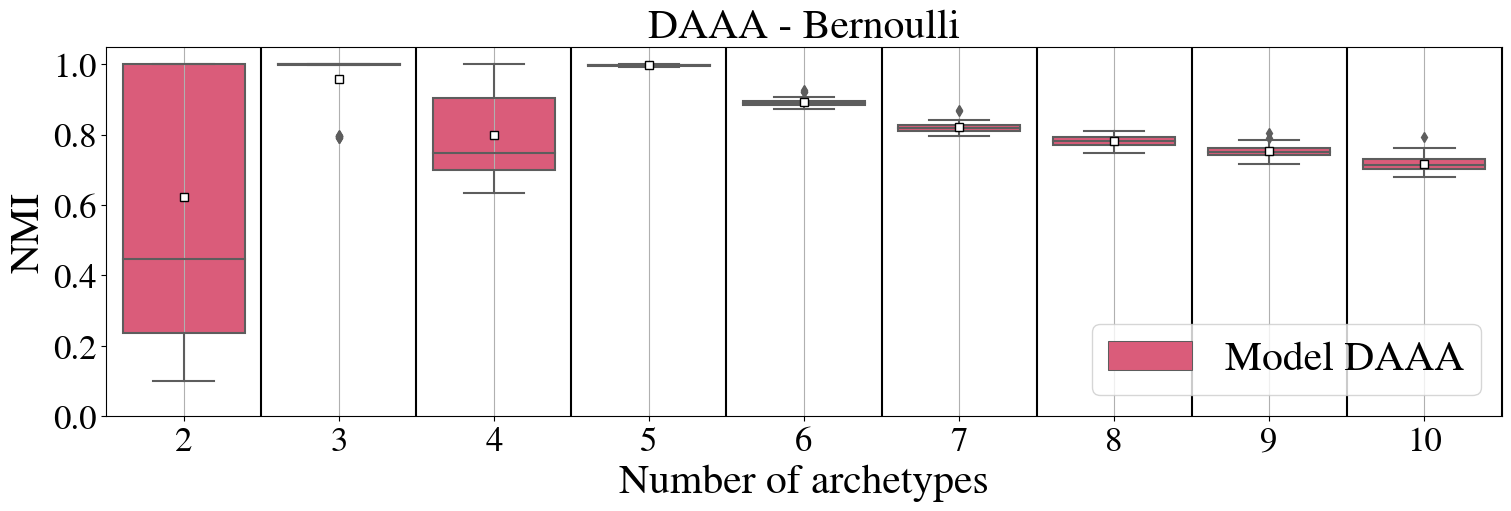

In [44]:
plot_nmi_stability(NMI,'DAAA','Bernoulli')

In [46]:
C,S,L = ClosedFormArchetypalAnalysis(X, np.arange(n_samples), 5, distribution, base)